In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [51]:
# Reading data from csv file and examine size of data as well as few rows of data
df = pd.read_csv("LTFS_data.csv")
print(df.shape)
df.head()

(233154, 41)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [52]:
df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [53]:
df.isnull().sum() # To check for null values

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [54]:
df.dropna(inplace=True)
df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

Getting Numerical Columns from dataset

In [55]:
numcol = list(df._get_numeric_data().columns)
numcol

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

Getting Categorical columns from data set

In [56]:
catcol = list(set(df.columns) - set(numcol))
catcol

['Employment.Type',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'DisbursalDate',
 'Date.of.Birth',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH']

In [57]:
# Distribution plots for numerical categories

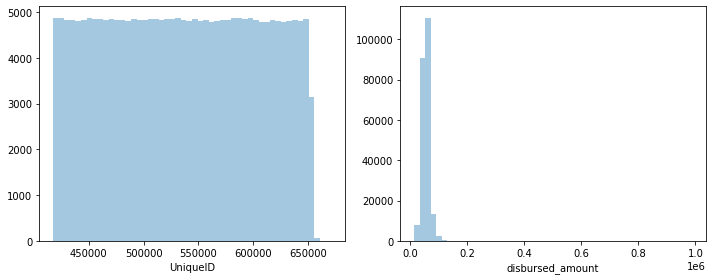

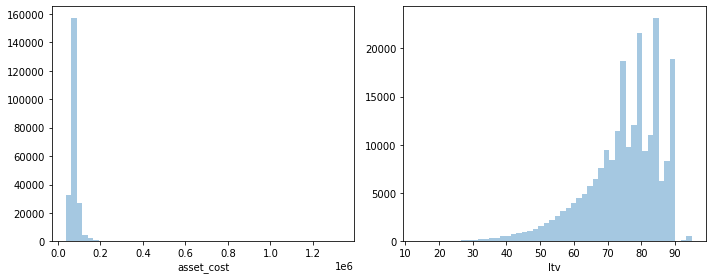

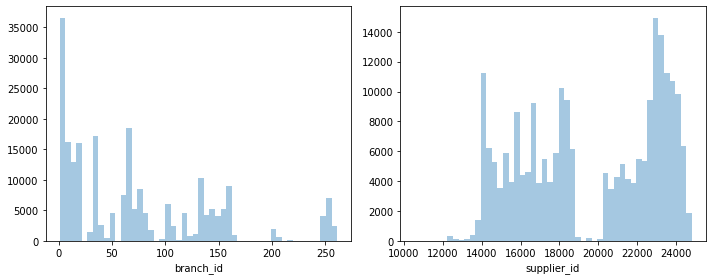

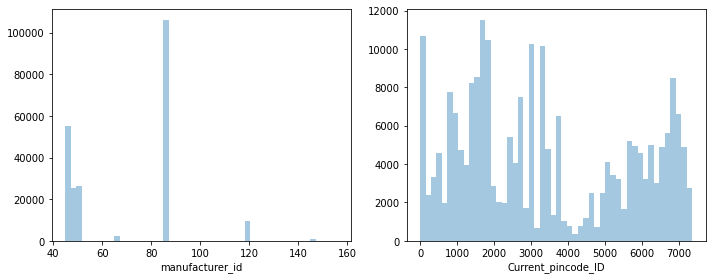

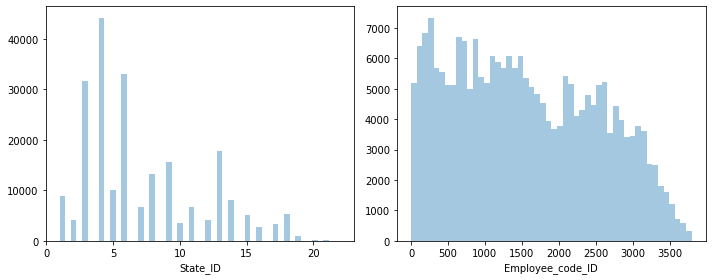

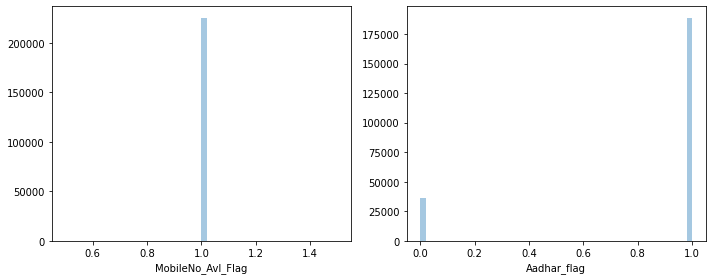

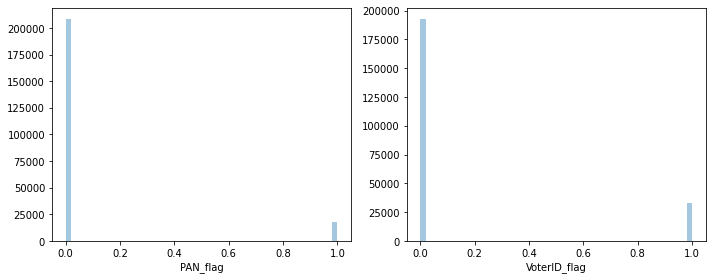

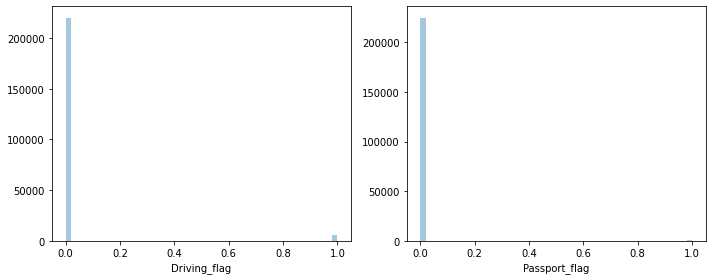

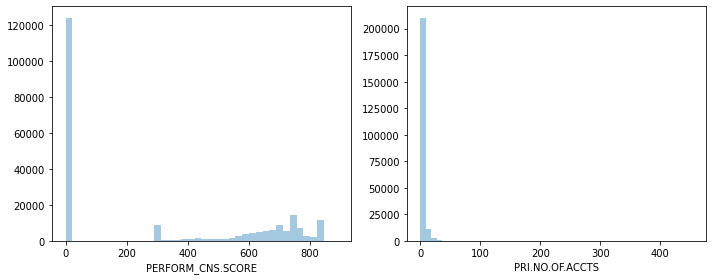

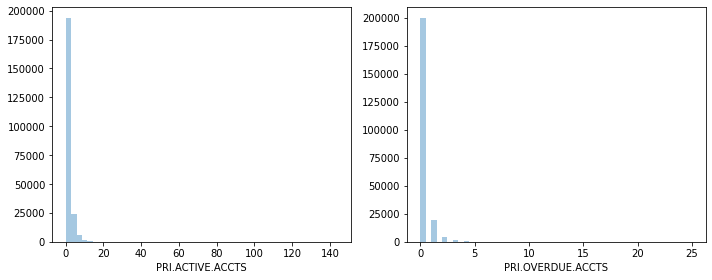

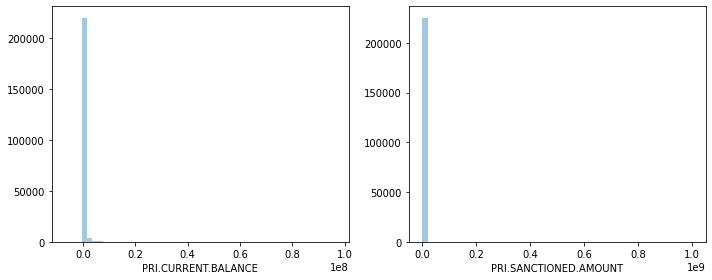

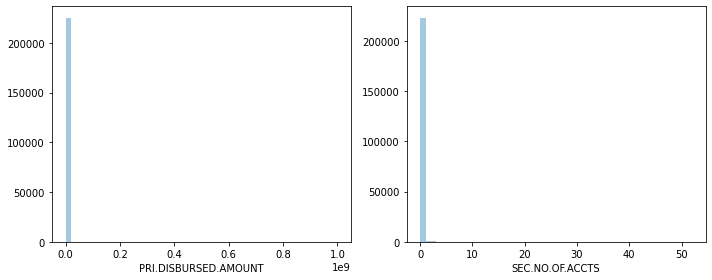

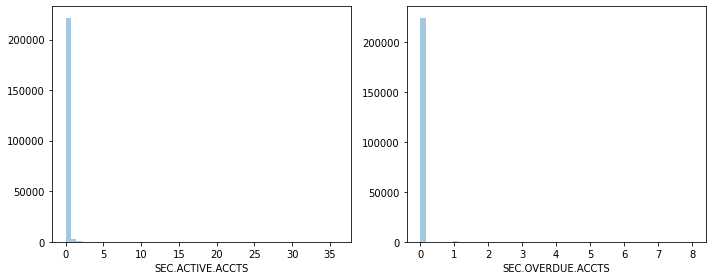

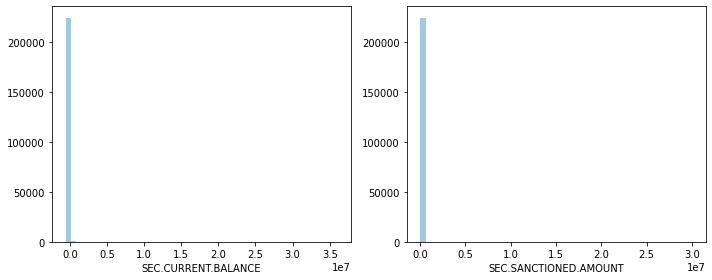

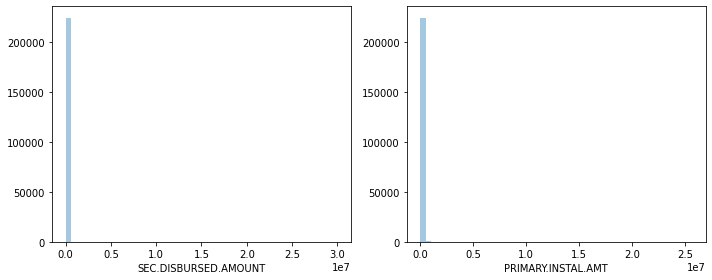

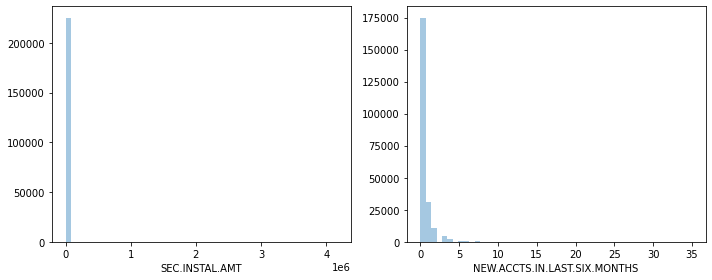

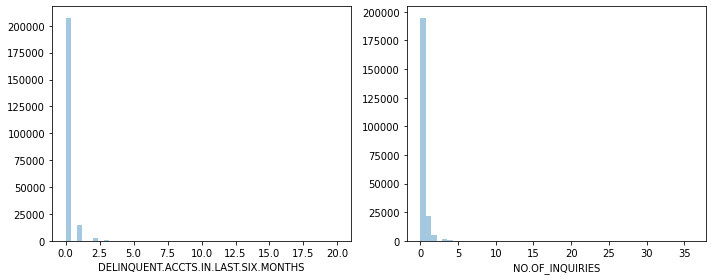

IndexError: list index out of range

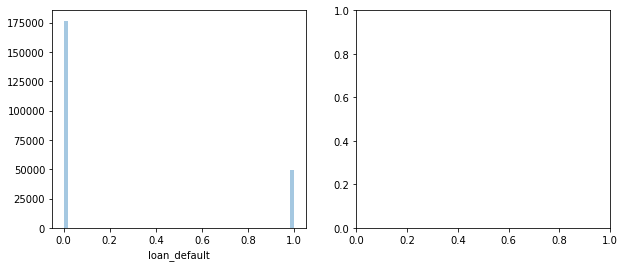

In [58]:
for i in range(0, len(numcol), 2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(df[numcol[i]], kde=False)
    plt.subplot(122)            
    sns.distplot(df[numcol[i+1]], kde=False)
    plt.tight_layout()
    plt.show()

Categorical Data Analysis

In [59]:
df[catcol].head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,DisbursalDate,Date.of.Birth,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,Salaried,No Bureau History Available,03-08-18,01-01-84,0yrs 0mon,0yrs 0mon
1,Self employed,I-Medium Risk,26-09-18,31-07-85,1yrs 11mon,1yrs 11mon
2,Self employed,No Bureau History Available,01-08-18,24-08-85,0yrs 0mon,0yrs 0mon
3,Self employed,L-Very High Risk,26-10-18,30-12-93,0yrs 8mon,1yrs 3mon
4,Self employed,No Bureau History Available,26-09-18,09-12-77,0yrs 0mon,0yrs 0mon


Two features AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH need to convert in terms of years.

In [60]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('yrs ','.',regex=False)
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('mon','',regex=False).astype(float)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('yrs ','.',regex=False)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('mon','',regex=False).astype(float)
df[catcol].head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,DisbursalDate,Date.of.Birth,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,Salaried,No Bureau History Available,03-08-18,01-01-84,0.00,0.00
1,Self employed,I-Medium Risk,26-09-18,31-07-85,1.11,1.11
2,Self employed,No Bureau History Available,01-08-18,24-08-85,0.00,0.00
3,Self employed,L-Very High Risk,26-10-18,30-12-93,0.80,1.30
4,Self employed,No Bureau History Available,26-09-18,09-12-77,0.00,0.00


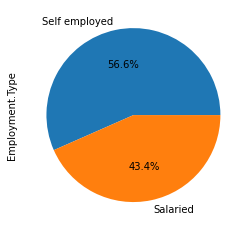

In [61]:
# Count the each category values from feature
df['Employment.Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

Age distribution of customers

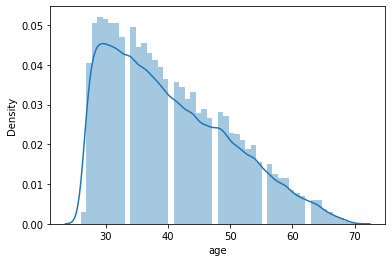

In [63]:
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'])  
now = pd.Timestamp.now()
df['Date.of.Birth'] = df['Date.of.Birth'].where(df['Date.of.Birth'] < now, df['Date.of.Birth'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['Date.of.Birth']).astype('<m8[Y]')
sns.distplot(df['age'])
plt.show()

Age at Disbursal

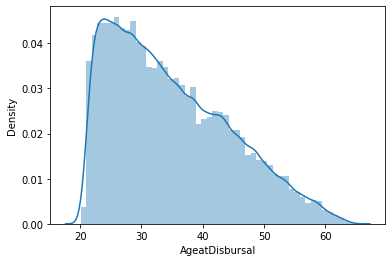

In [64]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'])
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'])

# Calculate Age at Disbursal in years
df['AgeatDisbursal'] = (df['DisbursalDate'] - df['Date.of.Birth']).dt.days / 365.25

# Plot age at disbursal distribution
sns.distplot(df['AgeatDisbursal'])
plt.show()

In [65]:
# Encode the values in terms of 0 and 1
df['Employment.Type'].replace({'Salaried': 0, 'Self employed': 1}, inplace=True)

In [66]:
# Identify unique values in each features
df.nunique()

UniqueID                               225493
disbursed_amount                        24228
asset_cost                              45415
ltv                                      6541
branch_id                                  82
supplier_id                              2945
manufacturer_id                            11
Current_pincode_ID                       6659
Date.of.Birth                           14417
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3269
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

Check Correlation

In [112]:
# Create correlation matrix
corr = df.corr()

# Set threshold for correlation
threshold = 0.5
corrlist = []

# Get the list of column names
cols = df.columns.tolist()

# Iterate through the correlation matrix
for i in range(1, corr.shape[0]):  # Ensure i doesn't go beyond the matrix size
    for j in range(i):
        # Check if the correlation is above the threshold and not equal to 1
        if (abs(corr.iloc[i, j]) > threshold) and (abs(corr.iloc[i, j]) < 1):
            corrlist.append([corr.iloc[i, j], i, j])

# Sort the list by correlation value, higher correlations first
sort_corr_list = sorted(corrlist, key=lambda x: abs(x[0]), reverse=True)

# Print correlations and column names
for corr_value, i, j in sort_corr_list:
    print(f"{cols[i]} and {cols[j]} = {round(corr_value, 2)}")

SEC.OVERDUE.ACCTS and SEC.ACTIVE.ACCTS = 1.0
NO.OF_INQUIRIES and CREDIT.HISTORY.LENGTH = 1.0
PRI.OVERDUE.ACCTS and PRI.ACTIVE.ACCTS = 1.0
SEC.OVERDUE.ACCTS and SEC.NO.OF.ACCTS = 0.93
SEC.ACTIVE.ACCTS and SEC.NO.OF.ACCTS = 0.93
Aadhar_flag and Employee_code_ID = -0.87
PRI.SANCTIONED.AMOUNT and PRI.CURRENT.BALANCE = 0.83
NEW.ACCTS.IN.LAST.SIX.MONTHS and SEC.INSTAL.AMT = 0.82
PERFORM_CNS.SCORE and Passport_flag = 0.75
asset_cost and disbursed_amount = 0.75
SEC.DISBURSED.AMOUNT and PERFORM_CNS.SCORE = 0.7
SEC.DISBURSED.AMOUNT and Passport_flag = 0.54
PRI.DISBURSED.AMOUNT and PRI.SANCTIONED.AMOUNT = 0.53
PRI.DISBURSED.AMOUNT and PRI.CURRENT.BALANCE = 0.51


Plotting distribution of classes of target variable

Distribution of the loan_default in the dataset
0    0.782845
1    0.217155
Name: loan_default, dtype: float64


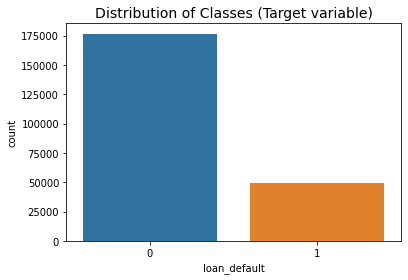

In [69]:
print('Distribution of the loan_default in the dataset')
print(df['loan_default'].value_counts()/len(df))

sns.countplot(data=df, x='loan_default')
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

In [ ]:
df.head()

No of Accounts created in last 6 months

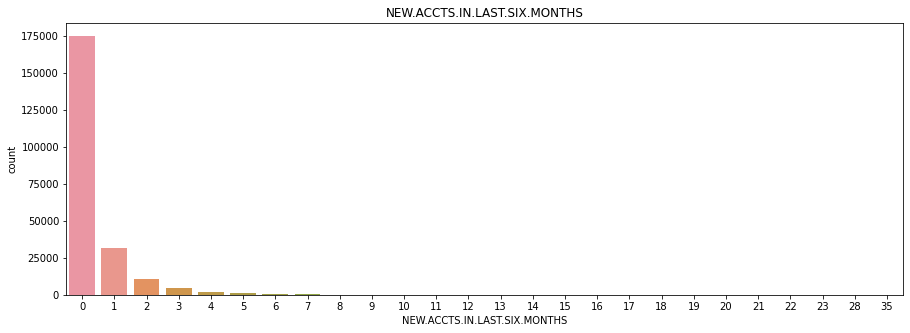

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='NEW.ACCTS.IN.LAST.SIX.MONTHS')
plt.title("NEW.ACCTS.IN.LAST.SIX.MONTHS")
plt.show()

In [71]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize=100).head()

0    0.775829
1    0.139077
2    0.047922
3    0.019402
4    0.008506
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

It can be infered around 77% of the customers have zero new loans taken by the them in last 6 months before the disbursment

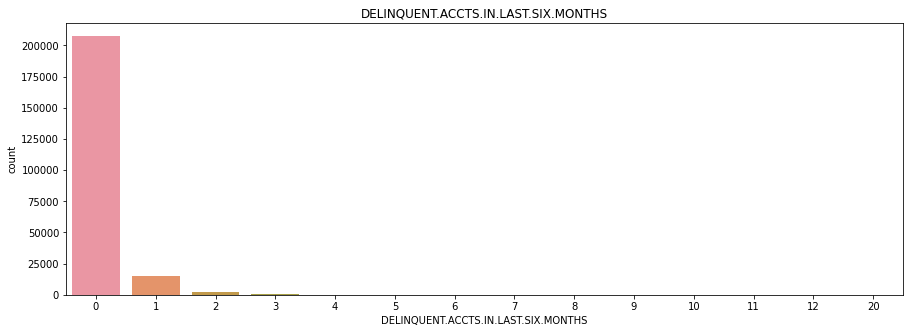

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS')
plt.title("DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS")
plt.show()

In [73]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize=100).head()

0    0.920858
1    0.065102
2    0.010666
3    0.002302
4    0.000603
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

It can be infered that around 86% of the customers have no loans defaulted in the last six months

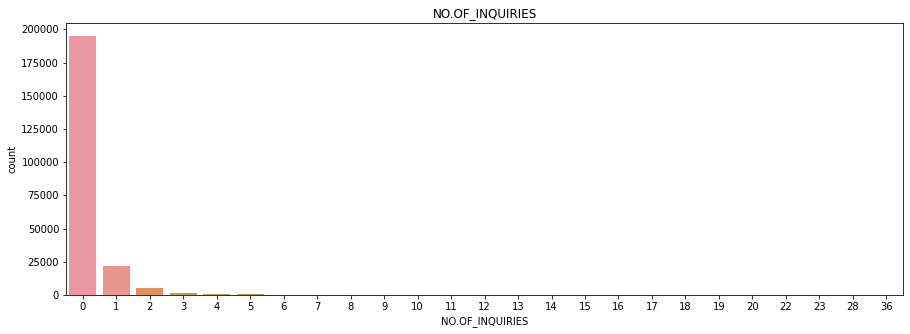

In [74]:
# No of Enquiries
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='NO.OF_INQUIRIES')
plt.title("NO.OF_INQUIRIES")
plt.show()

In [75]:
df['NO.OF_INQUIRIES'].value_counts(normalize=100).head()

0    0.864728
1    0.096650
2    0.023477
3    0.007645
4    0.003304
Name: NO.OF_INQUIRIES, dtype: float64

Around 86% of the customers have not made any enquiries before taking the loans

In [77]:
df = df.replace({'PERFORM_CNS.SCORE.DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'Very High',
                                                       'M-Very High Risk':'Very High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})

In [78]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

Not Scored    124253
Low            67577
Medium         12135
High           11774
Very High       9754
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

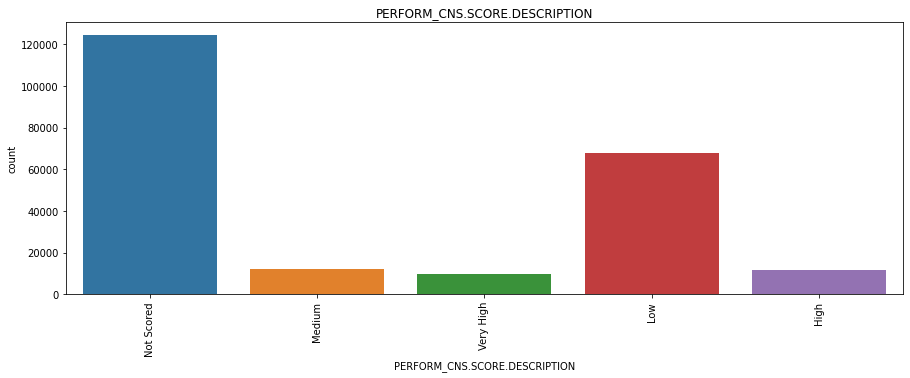

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['PERFORM_CNS.SCORE.DESCRIPTION'])
plt.title("PERFORM_CNS.SCORE.DESCRIPTION")
plt.xticks(rotation=90)
plt.show()

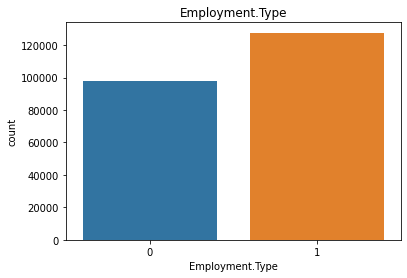

In [80]:
sns.countplot(data=df,x='Employment.Type')
plt.title("Employment.Type")
plt.show()

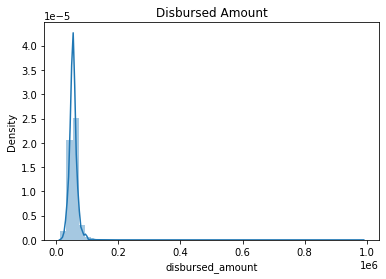

In [81]:
#disbursed_amount = Amount of Loan disbursed
sns.distplot(df['disbursed_amount'])
plt.title("Disbursed Amount")
plt.show()

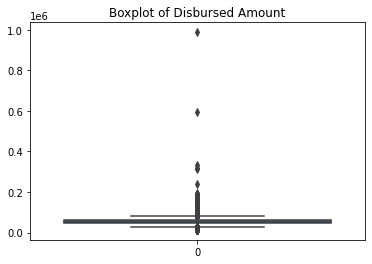

In [82]:
sns.boxplot(df['disbursed_amount'])
plt.title("Boxplot of Disbursed Amount")
plt.show()

It is heavily right skewed data.

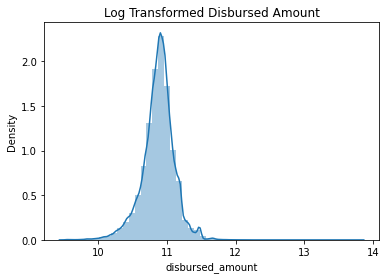

In [83]:
sns.distplot(np.log(df['disbursed_amount']))
plt.title("Log Transformed Disbursed Amount")
plt.show()

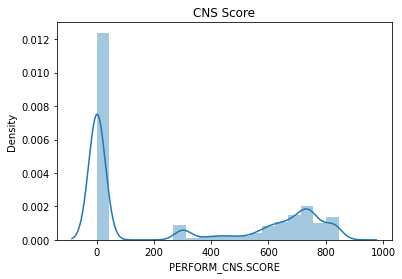

In [84]:
sns.distplot(df['PERFORM_CNS.SCORE'],bins=20)
plt.title("CNS Score")
plt.show()

Bivariate Analysis

Employment type Vs Loan Default

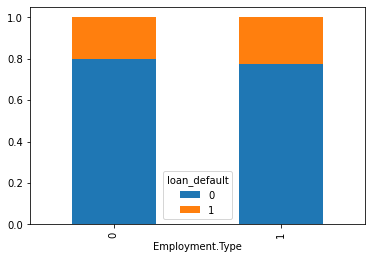

In [85]:
a = pd.crosstab(df['Employment.Type'],df['loan_default'],normalize="index")
a.plot(kind='bar', stacked = True)
plt.show()

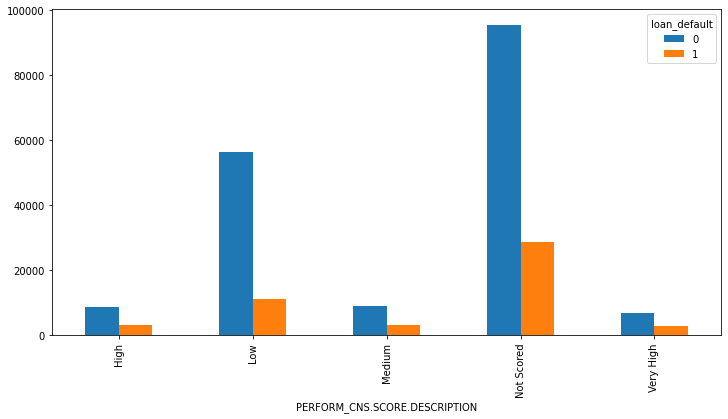

In [86]:
b = pd.crosstab(df['PERFORM_CNS.SCORE.DESCRIPTION'],df['loan_default'])
b.plot.bar(figsize=(12,6))
plt.show()

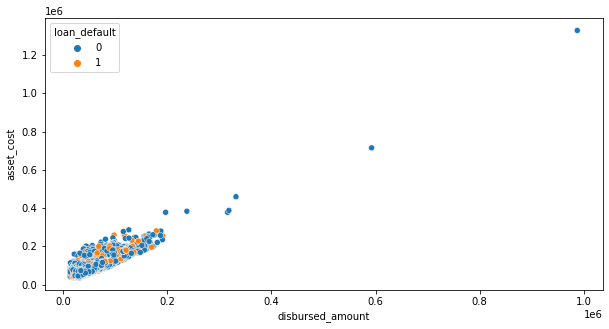

In [87]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["disbursed_amount"],y=df["asset_cost"],hue=df['loan_default'])
plt.show()

In [88]:
df[["disbursed_amount","asset_cost"]].corr()

,disbursed_amount,asset_cost
disbursed_amount,1.000000,0.746037
asset_cost,0.746037,1.000000


Strong correlation between disbursed amount and asset cost

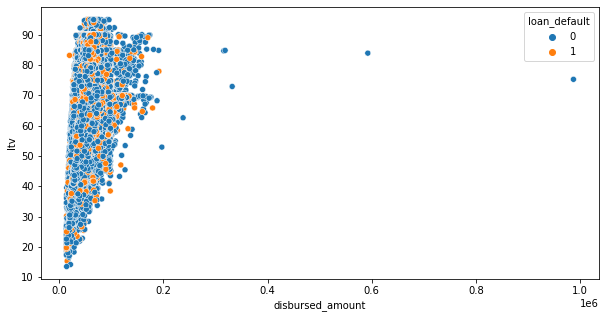

In [89]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["disbursed_amount"],y=df["ltv"],hue=df['loan_default'],markers="x")
plt.show()

Moderate Correlation

In [ ]:
Multivariate Analysis

In [98]:
new_df = df.copy()
new_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'age', 'AgeatDisbursal'],
      dtype='object')

Modelling

In [104]:
X = new_df.drop(['loan_default','Date.of.Birth','PERFORM_CNS.SCORE.DESCRIPTION','DisbursalDate'], axis=1)
y = new_df['loan_default'].copy()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (157845, 39)
X_test size:  (67648, 39)


Build and evaluate models
Define evaluation function which calculates following metrics:

Confusion matrix
Accuracy score
Precision
Recall
F1 score
ROC AUC score

In [102]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Precision: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))
    print("f1 score: ",metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

In [106]:
# Scaling training and testing data
scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Logistic Regression

In [107]:
# Find best parameters using grid search
params = {'C':[0.1, 0.5, 1, 5]}

lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[52636    86]
 [14848    78]]
Accuracy:  0.7792395931882686
Precision:  0.47560975609756095
Recall:  0.005225780517218277
f1 score:  0.010337972166998012
roc_auc_score:  0.5017972914573496


2. Decision Tree

In [108]:
params = {'criterion':['gini','entropy'], 'max_depth': [2,3,4,5]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, params)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[52722     0]
 [14926     0]]
Accuracy:  0.7793578524124882
Precision:  0.0
Recall:  0.0
f1 score:  0.0
roc_auc_score:  0.5


3. Random Forest

In [109]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[52222   500]
 [14494   432]]
Accuracy:  0.7783526490066225
Precision:  0.463519313304721
Recall:  0.02894278440305507
f1 score:  0.054483541430192954
roc_auc_score:  0.509729538705833
